In [23]:
!pip install matplotlib numpy scipy

Defaulting to user installation because normal site-packages is not writeable


This is a jupyter notebook on convolutions. The topics covered are:

    How to convolve two discrete sets of variables
    How to convolve two functions
    The uses of convolution

First, let's define convolution:

Convolution refers both to the function produced out of two other functions and the process of computing it. The order of the convolution matters, and it can be though of as multiplying two functions.

### Discrete Convolution (for sequences / digital signals)

For two discrete-time sequences $x[n]$ and $h[n]$ (both defined for integer $n$), the convolution $y[n] = (x * h)[n]$ is

$$
\boxed{
y[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n - k]
\qquad \text{(discrete convolution)}
}
$$

In practice (finite support or causal signals) the sum is taken over the overlapping indices only:

$$
y[n] = \sum_{k=\max(0, n-L_h+1)}^{\min(n, L_x-1)} x[k] \, h[n-k]
$$

where $L_x$ and $L_h$ are the lengths of $x$ and $h$.

### Continuous Convolution (for functions / analog signals)

For two continuous-time functions $x(t)$ and $h(t)$, the convolution $(x * h)(t)$ is defined as the integral

$$
\boxed{
(x * h)(t) = \int_{-\infty}^{\infty} x(\tau) \, h(t - \tau) \, d\tau
\qquad \text{(continuous convolution)}
}
$$

Equivalently (by substitution $\lambda = t - \tau$):

$$
(x * h)(t) = \int_{-\infty}^{\infty} x(t - \lambda) \, h(\lambda) \, d\lambda
$$

For functions that are supported from [0, infinity) i.e. are zero when their argument is less than 0 the convolution simplifies to:

$$
(x * h)(t) = \int_{0}^{t} x(\tau) \, h(t - \tau) \, d\tau
$$

### Side-by-side comparison

$$
\begin{array}{c|c}
\text{Discrete} & \text{Continuous} \\ \hline
\begin{array}{c}
y[n] = \\
\sum_{k=-\infty}^{\infty} x[k] \, h[n-k]
\end{array}
&
\begin{array}{c}
(y(t) = \\
\int_{-\infty}^{\infty} x(\tau) \, h(t-\tau) \, d\tau
\end{array}
\\[20pt] \hline
\text{sum over } k \in \mathbb{Z} & \text{integral over } \tau \in \mathbb{R} \\
\text{index shift } n-k & \text{time shift } t-\tau \\
\end{array}
$$

In [24]:
import math

def capacitor_charge(t, R=1, C=1):
    try:
        return math.exp(-t/(R*C))
    except:
        return 0

def voltage(t):
    if (t < 5.0 and t > 0.0):
        return 5
    else:
        return 0

### Exercise 1: Using continuous convolution to visualise the charge, discharge of a capacitor

In the above code, the function for a capacitors charging is given. We also have the function for the voltage applied accross it over time. Fill in the convolution function in the next block to plot the charge accross the capacitor as a function of time. If you want to understand convolutions better you can also watch the 3Blue1Brown episode on continuous convolutions: https://www.youtube.com/watch?v=IaSGqQa5O-M

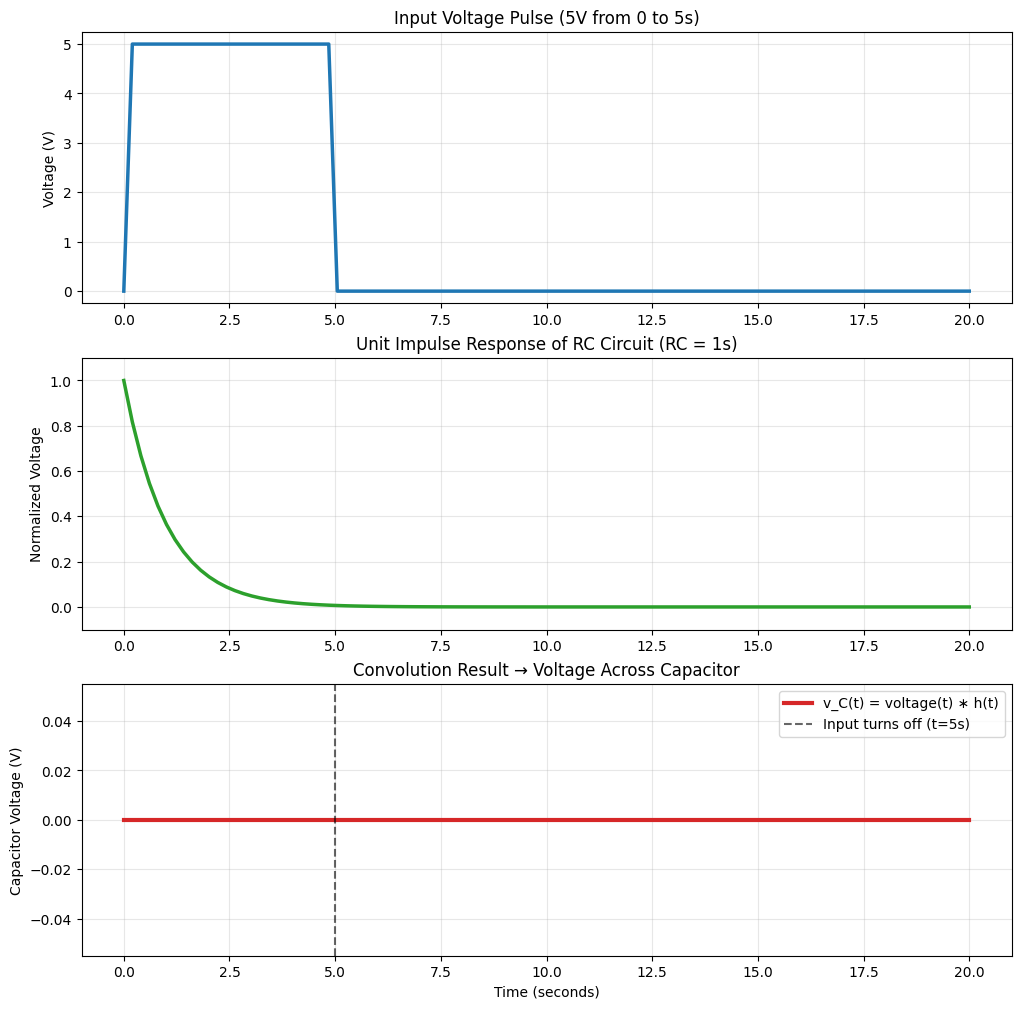

At t = 0⁺     → v_C = 0.000000 V
At t = 5s     → v_C ≈ 0.0000 V  (charging ends)
At t = 10s    → v_C ≈ 0.0000 V  (during discharge)
Peak voltage  → 0.0000 V
Theoretical peak at t=5s: 5*(1 - exp(-5)) ≈ 4.9663 V


In [30]:
def integral(x, start, end, stepSize=0.001):
    steps = int((end - start) / stepSize)
    integral = [0]
    for i in range(1, steps):
        integral.append(x(start + i * stepSize) * stepSize + integral[-1])
    return integral

def convolve(f, g, t, stepSize = 0.001):
    ### Code here to convolve f and g. 
    if (t < 0): 
        return 0.0
    integral = 0.0
        
    ### Hint: study first how to integrate a function in python, and then use the formula for continuous convolution above
    return integral

import matplotlib.pyplot as plt
import numpy as np

steps = int(100)
t_values = np.linspace(0, 20, steps)
v_in = [voltage(t) for t in t_values]
h_t  = [capacitor_charge(t) for t in t_values]
v_out = [convolve(voltage, capacitor_charge, t) for t in t_values]
# precision=2e-6 gives excellent accuracy with reasonable speed

# === Plotting (updated to work with scalar output) ===
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(t_values, v_in, label='Input voltage(t)', color='tab:blue', linewidth=2.5)
plt.title('Input Voltage Pulse (5V from 0 to 5s)')
plt.ylabel('Voltage (V)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(t_values, h_t, label='Step Response h(t) = 1 - e^{-t/RC}', color='tab:green', linewidth=2.5)
plt.title('Unit Impulse Response of RC Circuit (RC = 1s)')
plt.ylabel('Normalized Voltage')
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.subplot(3, 1, 3)
plt.plot(t_values, v_out, label='v_C(t) = voltage(t) ∗ h(t)', color='tab:red', linewidth=3)
plt.title('Convolution Result → Voltage Across Capacitor')
plt.xlabel('Time (seconds)')
plt.ylabel('Capacitor Voltage (V)')
plt.grid(True, alpha=0.3)

# Mark key points
plt.axvline(5, color='black', linestyle='--', alpha=0.6, label='Input turns off (t=5s)')
plt.legend()
plt.show()

# === Print meaningful results ===
idx5  = np.argmin(np.abs(t_values - 5.0))
idx10 = np.argmin(np.abs(t_values - 10.0))

print(f"At t = 0⁺     → v_C = {v_out[0]:.6f} V")
print(f"At t = 5s     → v_C ≈ {v_out[idx5]:.4f} V  (charging ends)")
print(f"At t = 10s    → v_C ≈ {v_out[idx10]:.4f} V  (during discharge)")
print(f"Peak voltage  → {max(v_out):.4f} V")
print(f"Theoretical peak at t=5s: 5*(1 - exp(-5)) ≈ {5*(1-math.exp(-5)):.4f} V")

Now let's study the discrete version of the convolution. For this, I reccomend watching the episode from 3Blue1Brown once again for this topic if you have the time: https://youtu.be/KuXjwB4LzSA?si=tRmFxgKbvUavzqNM. For the first exercise we will smooth a signal that is noisy. Run the next block to produce and display the noisy signal:

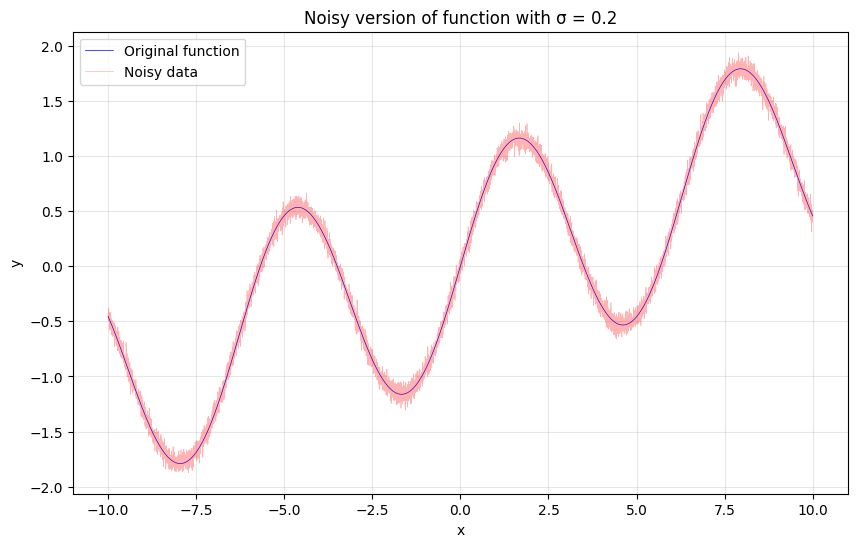

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def make_noisy_dataset(f, x_min=-10, x_max=10, num_points=8192, noise_level=0.2, seed=42):
    """
    Convert a function f to a noisy dataset and plot it.
    
    Parameters:
    - f: callable, the function f(x)
    - x_min, x_max: range of x values
    - num_points: how many points to sample
    - noise_level: standard deviation of Gaussian noise
    - seed: for reproducible noise
    """
    np.random.seed(seed)
    
    # Create evenly spaced x values
    x = np.linspace(x_min, x_max, num_points)
    
    # Clean function values
    y_clean = f(x)
    
    # Add Gaussian noise
    noise = np.random.normal(loc=0, scale=noise_level, size=y_clean.shape)
    y_noisy = y_clean + noise
    
    return x, y_clean, y_noisy

# Example usage with different functions:

# 1. Sine wave
def my_func(x):
    return 0.1 * x + np.sin(x)

x, y_clean, y_noisy = make_noisy_dataset(my_func, noise_level=0.05)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_clean, label='Original function', color='blue', linewidth=0.5)
plt.plot(x, y_noisy, label='Noisy data', color='red', alpha=0.3, linewidth=0.5) 
plt.title(f'Noisy version of function with σ = 0.2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 2. Quadratic (uncomment to try)
# make_noisy_dataset(lambda x: x**2 - 3*x + 1, x_min=-3, x_max=6, noise_level=1.5)

# 3. Exponential
# make_noisy_dataset(np.exp, x_min=-2, x_max=2, noise_level=0.5)

To filter out the noise, we want to remove high frequencies from the noisy data so that only lower frequencies remain. Let's plot the desired frequency response of our filter and its impulse response:

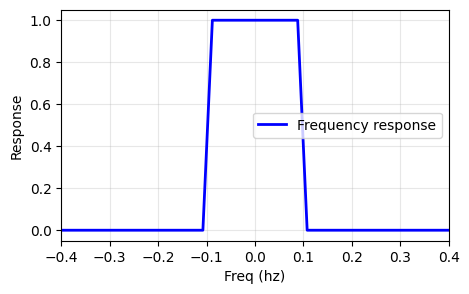

In [27]:
maxFreq = 0.1

def filterFreqResponse(omega):
    return np.abs(omega) <= maxFreq

N = 512
samplingFreq = 10
freq_space = np.linspace(-samplingFreq/2, samplingFreq/2, N)
freq_values = filterFreqResponse(freq_space)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(freq_space, freq_values, label='Frequency response', color='blue', linewidth=2)
plt.xlabel('Freq (hz)')
plt.ylabel('Response')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-0.4, 0.4)
plt.show()

Now let's use the inverse fourier transform to get the time domain function of our filter:

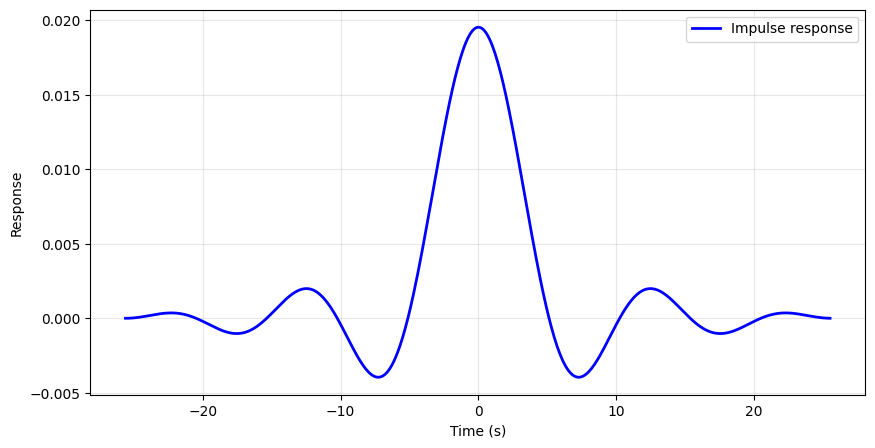

In [28]:
from scipy.fft import ifft, ifftshift, fftshift

filterImpulseResponse = np.real(ifft(ifftshift(freq_values)))  # only one ifftshift
filterImpulseResponse = fftshift(filterImpulseResponse)
freq_diff = freq_space[1] - freq_space[0]
time_diff = 1 / samplingFreq
time_axis = (np.arange(N) - N/2) * time_diff

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time_axis, filterImpulseResponse, label='Impulse response', color='blue', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Convolving this filter with our original signal will remove the high frequencies. I have plotted what it should look like and your function next to each other. Reminder: The convolution function is:

For two discrete-time sequences $x[n]$ and $h[n]$ (both defined for integer $n$), the convolution $y[n] = (x * h)[n]$ is

$$
\boxed{
y[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n - k]
\qquad \text{(discrete convolution)}
}
$$

In practice (finite support or causal signals) the sum is taken over the overlapping indices only:

$$
y[n] = \sum_{k=\max(0, n-L_h+1)}^{\min(n, L_x-1)} x[k] \, h[n-k]
$$

where $L_x$ and $L_h$ are the lengths of $x$ and $h$.

Ignore the X axis as it doesn't match up to the original signals due to it just being the index of the plotted point in the array

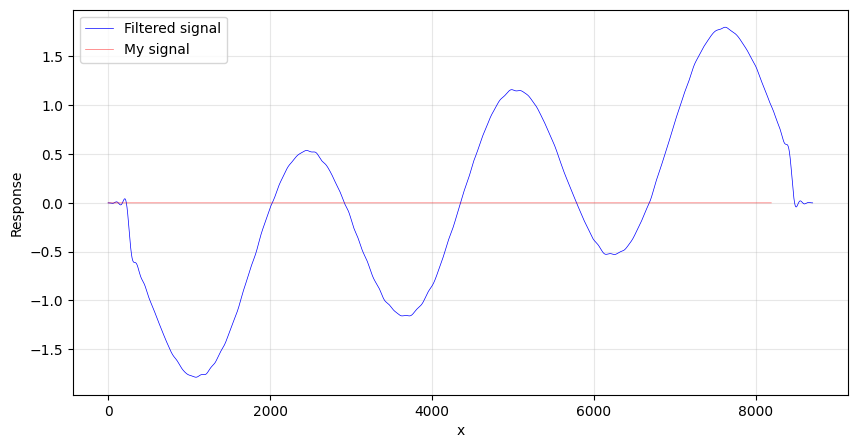

In [29]:
def myConvolve(f, s):
    L_f = len(f)
    L_s = len(s)
    convolution = np.zeros(L_s)
    for n in range(L_s):
        # Do a convolution for each item in s and delete the continue
        continue
        
    return convolution
    
cleaned = np.convolve(filterImpulseResponse, y_noisy)
my_cleaned = myConvolve(filterImpulseResponse, y_noisy)

plt.figure(figsize=(10, 5))
plt.plot(cleaned, label='Filtered signal', color='blue', linewidth=0.5)
plt.plot(my_cleaned, label='My signal', color='red', alpha = 0.6, linewidth=0.5)
plt.xlabel('x')
plt.ylabel('Response')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()